In [98]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(readr)
library(forcats)
library(reshape2)
library("dplyr")
library("foreign")
library("data.table")
library("car")
library(semPlot)
library(lavaan)
library(factoextra)

In [99]:
data <- read_csv("nsw.csv", show_col_types = FALSE)
categorical_columns <- c(
  "Gender", "Industry", "FamilyStatus",
  "Location",  "ManagingRole"
)
numeric_columns <- c(
  "Age","Experience", "CommuteTimeDiff", "WorkTimeDiff", "HouseworkTimeDiff",
   "FamilyTimeDiff", "RemoteWorkExtent", "RemoteWorkSupport", "Productivity",
  "ReducedPromotion", "SocialIsolation", "SleepTimeDiff",
  "ExtraCosts", "WorkCompatibility", "Motivation",
  "HomeEnvironment", "Wellbeing", "MentalHealth", "PhysicalActivity",
  "Sociability"
)

In [100]:
data[numeric_columns] <- lapply(data[numeric_columns], scale)

In [101]:
# scree.plot(data[numeric_columns])

In [102]:
library("psych")
library("psy")
library("tidyverse") 

correlation_matrix <- cor(data[numeric_columns], use = "complete.obs")

data <- na.omit(data)


pr_ititial <- principal(correlation_matrix,
    nfactors = 9,
    rotate = "varimax"
)
# h2 - communalities
print(pr_ititial$Structure, digits=3, cutoff = 0.4, sort = T)


Loadings:
                  RC1    RC2    RC3    RC6    RC4    RC7    RC5    RC9   
SocialIsolation    0.735                                                 
ExtraCosts         0.716                                                 
WorkCompatibility  0.693                                                 
Motivation         0.737                                                 
HomeEnvironment    0.788                                                 
Wellbeing          0.780                                                 
Productivity              0.673                                          
MentalHealth              0.785                                          
PhysicalActivity          0.806                                          
CommuteTimeDiff                  0.827                                   
FamilyTimeDiff                  -0.824                                   
RemoteWorkExtent                        0.784                            
RemoteWorkSupport          

In [103]:
library(lavaan)

model <- '
  WorkAlignment =~ WorkCompatibility + Motivation
  HolisticWellBeing =~ MentalHealth + PhysicalActivity + Productivity 
  RemoteWorkBenefits =~ RemoteWorkExtent + RemoteWorkSupport + WorkCompatibility
  WorkEnvironment =~ CommuteTimeDiff + RemoteWorkExtent + Productivity
  LifeBalance =~ Age + CommuteTimeDiff + FamilyTimeDiff
  PersonalFactors =~ Age + Motivation                   

  MentalHealth ~ WorkAlignment + WorkEnvironment + PersonalFactors  

  HolisticWellBeing ~ WorkAlignment + RemoteWorkBenefits + WorkEnvironment + LifeBalance

  WorkAlignment ~~ CommuteTimeDiff
'

fit <- sem(model, data = data[numeric_columns])

chisq_value <- fitMeasures(fit, "chisq")
df <- fitMeasures(fit, "df")
p_value <- fitMeasures(fit, "pvalue")

# Print the results
cat("Chi-square value:", chisq_value, "\n")
cat("Degrees of freedom:", df, "\n")
cat("P-value:", p_value, "\n")

lavInspect(fit, "cov.lv")
summary(fit, fit.measures = TRUE)

varTable(fit)

Warning message in lav_object_post_check(object):
"lavaan WARNING: covariance matrix of latent variables
                is not positive definite;
                use lavInspect(fit, "cov.lv") to investigate."


Chi-square value: 12.40095 
Degrees of freedom: 11 
P-value: 0.3342718 


,WorkAlignment,HolisticWellBeing,RemoteWorkBenefits,WorkEnvironment,LifeBalance,PersonalFactors
WorkAlignment,0.39784644,0.243946915,0.20605504,0.16155957,-0.117708672,0.03205371
HolisticWellBeing,0.24394692,0.650969744,0.32319792,0.15130761,0.007510213,-0.05863569
RemoteWorkBenefits,0.20605504,0.323197917,0.47763154,-0.05008165,-0.040138978,0.06493817
WorkEnvironment,0.16155957,0.151307608,-0.05008165,0.04496053,-0.118395502,0.08306181
LifeBalance,-0.11770867,0.007510213,-0.04013898,-0.11839550,0.284680724,-0.29080251
PersonalFactors,0.03205371,-0.058635694,0.06493817,0.08306181,-0.290802507,0.29197905


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
WorkAlignment,=~,WorkCompatibility,0,1.00000000,0.00000000,NA,NA
WorkAlignment,=~,Motivation,0,1.16603111,0.45231942,2.57789313,9.940474e-03
HolisticWellBeing,=~,MentalHealth,0,1.00000000,0.00000000,NA,NA
HolisticWellBeing,=~,PhysicalActivity,0,0.87960645,0.07999069,10.99635971,0.000000e+00
HolisticWellBeing,=~,Productivity,0,0.62761435,0.05720182,10.97193057,0.000000e+00
RemoteWorkBenefits,=~,RemoteWorkExtent,0,1.00000000,0.00000000,NA,NA
RemoteWorkBenefits,=~,RemoteWorkSupport,0,0.77070383,0.28443762,2.70957064,6.737036e-03
RemoteWorkBenefits,=~,WorkCompatibility,0,-0.29055022,0.22947606,-1.26614612,2.054608e-01
WorkEnvironment,=~,CommuteTimeDiff,0,1.00000000,0.00000000,NA,NA


,name,idx,nobs,type,exo,user,mean,var,nlev,lnam
,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>
1,WorkCompatibility,14,1420,numeric,0,0,-2.467877e-18,1,0,
2,Motivation,15,1420,numeric,0,0,-6.271048e-17,1,0,
3,MentalHealth,18,1420,numeric,0,0,1.405813e-16,1,0,
4,PhysicalActivity,19,1420,numeric,0,0,5.093536e-18,1,0,
5,Productivity,9,1420,numeric,0,0,1.400470e-16,1,0,
6,RemoteWorkExtent,7,1420,numeric,0,0,1.142824e-16,1,0,
7,RemoteWorkSupport,8,1420,numeric,0,0,1.497034e-16,1,0,
8,CommuteTimeDiff,3,1420,numeric,0,0,-4.963749e-17,1,0,
9,Age,1,1420,numeric,0,0,9.785306e-19,1,0,


In [104]:
parameterEstimates(fit)


lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WorkAlignment,=~,WorkCompatibility,1.00000000,0.00000000,NA,NA,1.00000000,1.000000000
WorkAlignment,=~,Motivation,1.16603111,0.45231942,2.57789313,9.940474e-03,0.27950135,2.052560878
HolisticWellBeing,=~,MentalHealth,1.00000000,0.00000000,NA,NA,1.00000000,1.000000000
HolisticWellBeing,=~,PhysicalActivity,0.87960645,0.07999069,10.99635971,0.000000e+00,0.72282757,1.036385336
HolisticWellBeing,=~,Productivity,0.62761435,0.05720182,10.97193057,0.000000e+00,0.51550085,0.739727844
RemoteWorkBenefits,=~,RemoteWorkExtent,1.00000000,0.00000000,NA,NA,1.00000000,1.000000000
RemoteWorkBenefits,=~,RemoteWorkSupport,0.77070383,0.28443762,2.70957064,6.737036e-03,0.21321633,1.328191318
RemoteWorkBenefits,=~,WorkCompatibility,-0.29055022,0.22947606,-1.26614612,2.054608e-01,-0.74031503,0.159214589
WorkEnvironment,=~,CommuteTimeDiff,1.00000000,0.00000000,NA,NA,1.00000000,1.000000000


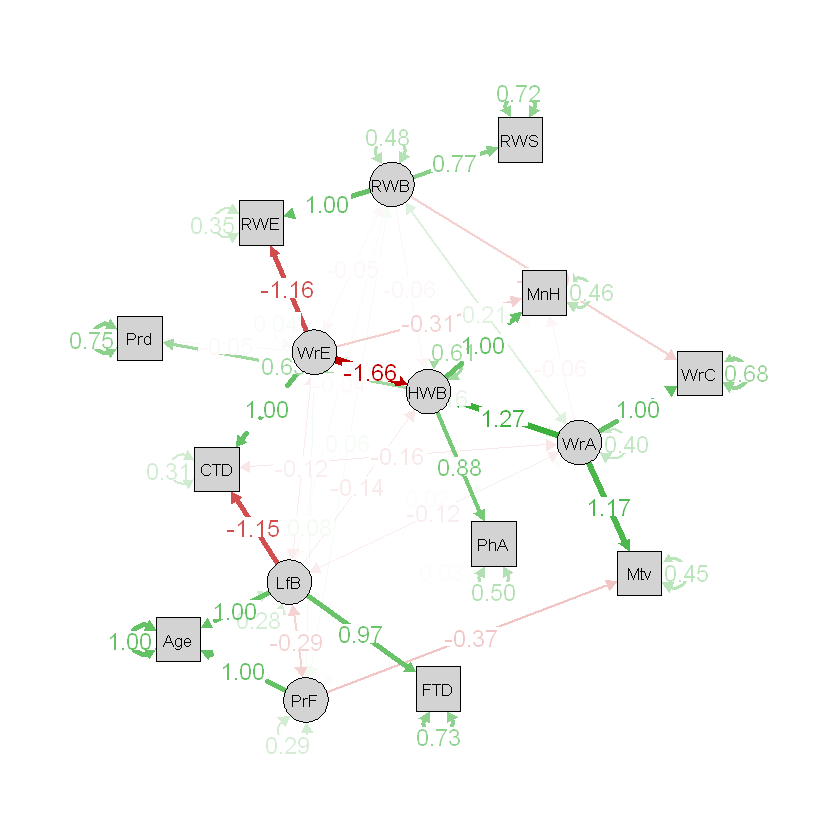

In [ ]:
library(semPlot)

semPaths(
    object =fit,
    what ="par",
    style ='ram',
    layout ="spring",
    rotation =1,
    sizeMan =5,
    sizeLat =5,
    color ="lightgray",
    edge.label.cex =1.2,
    label.cex =1.2,
    nCharNodes = 3
)